<a href="https://colab.research.google.com/github/jeevan-nh/Google-collab-udemy-DL-course/blob/master/Mega_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MEGA CASE STUDY

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##IDENTIFING THE FRAUDS USING SOM

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit_Card_Applications.csv')

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [0]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10,input_len = 15,sigma=1.0,learning_rate=0.5) #initilizing the SOM

som.random_weights_init(X) #initilizing the random weights
som.train_random(data = X,num_iteration=100) #training the model

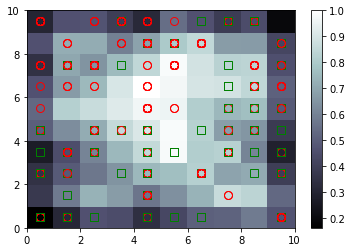

In [0]:
from pylab import bone,pcolor,colorbar,plot,show
bone() #creats the panel for our figure
pcolor(som.distance_map().T) #creats a heatmap of the som
colorbar() #creats a legend
markers = ['o','s']
colors = ['r','g']
for i,x  in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[Y[i]],
       markeredgecolor = colors[Y[i]],
       markerfacecolor = 'None',
       markersize = 8,
       markeredgewidth = 1)
show()

In [0]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,6)], mappings[(5,7)],mappings[(5,5)],mappings[(4,5)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Going from unsupervised to supervised learning

In [0]:
customers = dataset.iloc[:,1:].values #creating the feature list
is_fraud = np.zeros(len(dataset)) #creating a target vector and initilizing the vector to zero
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds: #getting the customer_id from dataset
    is_fraud[i] = 1

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2





690/690 [==============================] - 1s 2ms/step - loss: 0.4997 - acc: 0.9478
Epoch 2/2
690/690 [==============================] - 1s 948us/step - loss: 0.2062 - acc: 0.9507


In [0]:
# Predicting the prob of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [14]:
y_pred

array([[1.56214230e+07, 2.08178163e-03],
       [1.57997850e+07, 5.96830249e-03],
       [1.55775150e+07, 9.38126445e-03],
       ...,
       [1.57938250e+07, 3.41828823e-01],
       [1.57365330e+07, 3.41828823e-01],
       [1.56472950e+07, 3.41828823e-01]])